# ClothesPicker


In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
from utils import Preprocess, Clothing, AllClothes, ImageCaptioner

In [3]:
from PIL import Image, ImageFilter
import glob
import os
import numpy as np
import random
import json
import re

In [4]:
def show(array):
    Image.fromarray(array).show()

In [5]:
preprocessing = [
    ("resize", {"size":255}),
    ("square_crop", {"size":224}),
    # ("background", {})
]
clothes = AllClothes()
clothes.clothes = [Clothing(Image.open(f), preprocessing) for f in glob.glob("./photos/*")]

## Image Captioning

In [47]:
from bardapi import BardCookies
import io

In [48]:
test_image = clothes[0].image

In [40]:
# so as to not expose the api key (based on this guide: https://github.com/dsdanielpark/Bard-API#authentication)
bard_key = input("enter bard key")

enter bard key aQiKlcuJ8XuzNiptVGh6CLzm-UC7CgHSNcGiGNkfS0T8ANPorzPMs2ITT7seK_-hsqwPXA.


In [42]:
from bardapi import BardCookies

cookie_dict = {
    "__Secure-1PSID": "",
    "__Secure-1PSIDTS": ""
}

In [44]:
bard = BardCookies(cookie_dict=cookie_dict)

In [53]:
b = io.BytesIO()
test_image.save(b, format="PNG")

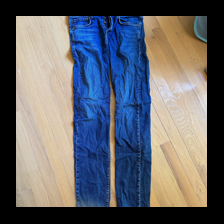

In [76]:
index = random.randint(0, len(clothes.clothes)-1)
display(clothes[index].image)
response = bard.ask_about_image("Describe this article of clothing", image=clothes[index].bytes)

In [80]:
print(choices['content'])

The article of clothing in the image is a pair of blue jeans. They are sitting on a wooden floor. The jeans are made of denim, a sturdy cotton fabric. They have a straight leg and a button fly. There are five pockets on the jeans: two front pockets, two back pockets, and a coin pocket. The jeans are in good condition and appear to be new or recently washed.

Is there anything else I can help you with?


## Lets try some prompts:

In [13]:
prompt = """Describe this article of clothing. You should describe the article of categories in a json format using the example below:
```
{
    color: COLOR,
    category: Pants, Tshirt, Jacket, Polo Shirt, ...,
    description: SHORT DESCRIPTION,
    material: MATERIAL,
    season, WINTER, SUMMER, FALL, SPRING, ALL
    
}
```
"""
pattern = r"\{(.*?)\}"


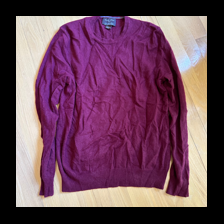

{'color': 'Purple', 'category': 'Sweater', 'description': 'A purple crew-neck sweater made of merino wool.', 'material': 'Merino wool', 'season': 'FALL, WINTER'}


In [117]:
index = random.randint(0, len(clothes.clothes)-1)
display(clothes[index].image)
response = bard.ask_about_image(input_text=prompt, image=clothes[index].bytes)
pattern = r"\{(.*?)\}"
matches = re.findall(pattern, response['content'], re.DOTALL)
print(json.loads(f"{{\n{matches[0]}\n}}"))

In [118]:
a = re.compile(pattern)

### Class ImageCaptioner:

In [ ]:
cookie_dict = {
    "__Secure-1PSID": "",
    "__Secure-1PSIDTS": ""
} # bard cookiedict

captioner = ImageCaptioner(cookie_dict)

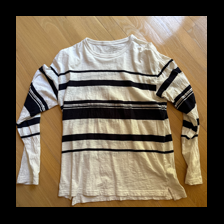

In [16]:
display(clothes[5].image)
data = captioner(clothes[5])

In [17]:
print(data)

{'color': 'Black and white', 'category': 'T-shirt', 'description': 'A black and white striped t-shirt made of cotton.', 'material': 'Cotton', 'season': 'ALL'}


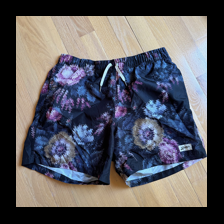

{'color': 'Blue',
 'category': 'Shorts',
 'description': 'A pair of blue shorts made of cotton.',
 'material': 'Cotton',
 'season': 'Summer'}

In [21]:
display(clothes[30].image)
captioner(clothes[30])

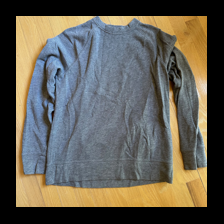

{'color': 'gray',
 'category': 'T-shirt',
 'description': 'A gray crew neck t-shirt made of cotton.',
 'material': 'cotton',
 'season': 'ALL'}

In [24]:
display(clothes[40].image)
captioner(clothes[40])

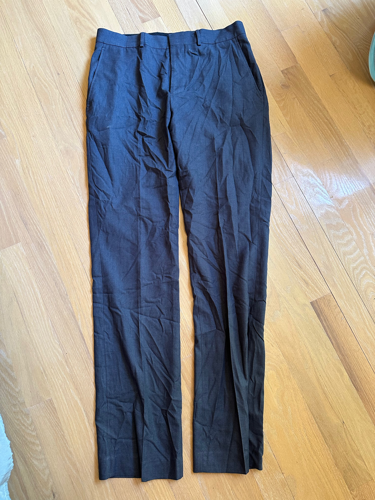

In [36]:
high_res = Clothing(Image.open("./photos/IMG_0238.jpeg"), preprocessing=[])
# these are suit pants:
display(Preprocess.resize(high_res.image, 500))

In [33]:
captioner(high_res)

{'color': 'Black',
 'category': 'Pants',
 'description': 'A pair of black pants made of cotton.',
 'material': 'Cotton',
 'season': 'ALL'}